# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


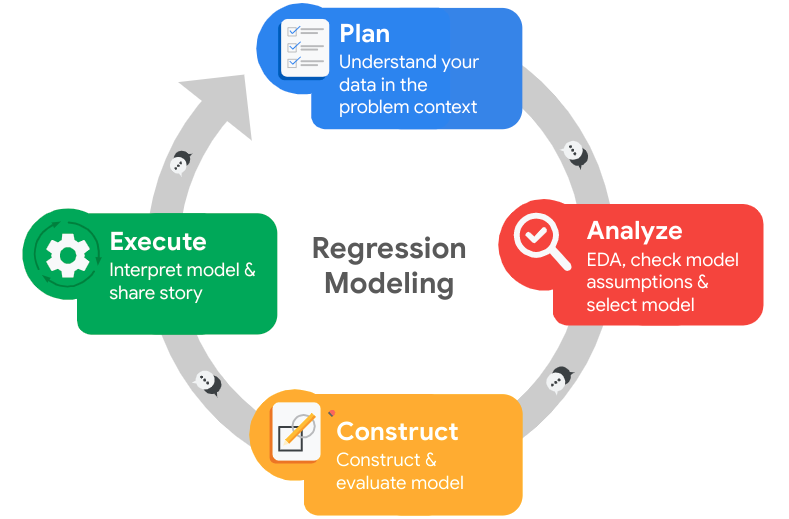

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The stakeholders are the human resources department as well as the executive level of the company Sailfort Motors.
We are trying to predict an employees' decsision to stay or leave based upon several variables collected during their tenure.
The data set is medium sized and is somewhat dirty.  It includes variables that the employees subjectively generate, variables the company subjectively genrates, and more objective variables.
I have and will be using 
Pandas : https://pandas.pydata.org/docs/
Matplotlib: https://matplotlib.org/stable/index.html
Seaborn: https://seaborn.pydata.org
SKLearn: https://scikit-learn.org/stable/
XGBoost: https://xgboost.readthedocs.io/en/stable/
Numpy: https://numpy.org/doc/
There is no personal information for identification purposes or any other information that might lead to inadvertant discrimination in the data set, so no there are no ethical considerations at this point.


### Import packages

In [1]:
import pandas as pd

In [2]:
from pandas import MultiIndex, Int16Dtype

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

/Users/patrickanderson/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [4]:
df = pd.read_csv("HR_capstone_dataset.csv")
pd.set_option('display.max_columns', None)

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Gather descriptive statistics about the data

In [6]:
df.shape

(14999, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
col_rename_dict = {'average_montly_hours': 'average_monthly_hours',
                  'time_spend_company':'tenure',
                  'Department':'department',
                  'Work_accident':'work_accident'}
df.rename(mapper=col_rename_dict, axis=1,inplace=True)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [10]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### There are no missing values in any of the features.

### Check duplicates

Check for any duplicate entries in the data.

In [11]:
mask = df.duplicated(keep=False)
df_duplicated = df[mask]
df_duplicated.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [12]:
df_duplicated.shape

(5346, 10)

There appear to be a significant number of duplicate rows in the data (50% of above df).  

In [13]:
df_duplicated.sort_values(by=['satisfaction_level','last_evaluation', 'average_monthly_hours',
                             'department','salary'])

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
13089,1.00,0.88,6,201,4,0,0,0,technical,low
11375,1.00,0.93,5,167,3,0,0,0,sales,medium
13586,1.00,0.93,5,167,3,0,0,0,sales,medium
10691,1.00,0.93,5,231,2,0,0,0,marketing,medium


### The duplicated rows appear to actually be duplicates as far as can be determined without an employee identification variable. While it is plausible that some employees may have identical values for all variables, it is likely that most or all are actual duplicates so they will be removed.

In [14]:
# df1 will be the new dataframe without duplicates
df.drop_duplicates(keep='first', inplace=True)
df.shape


(11991, 10)

### 3008 Duplicated rows have been removed from the dataframe.


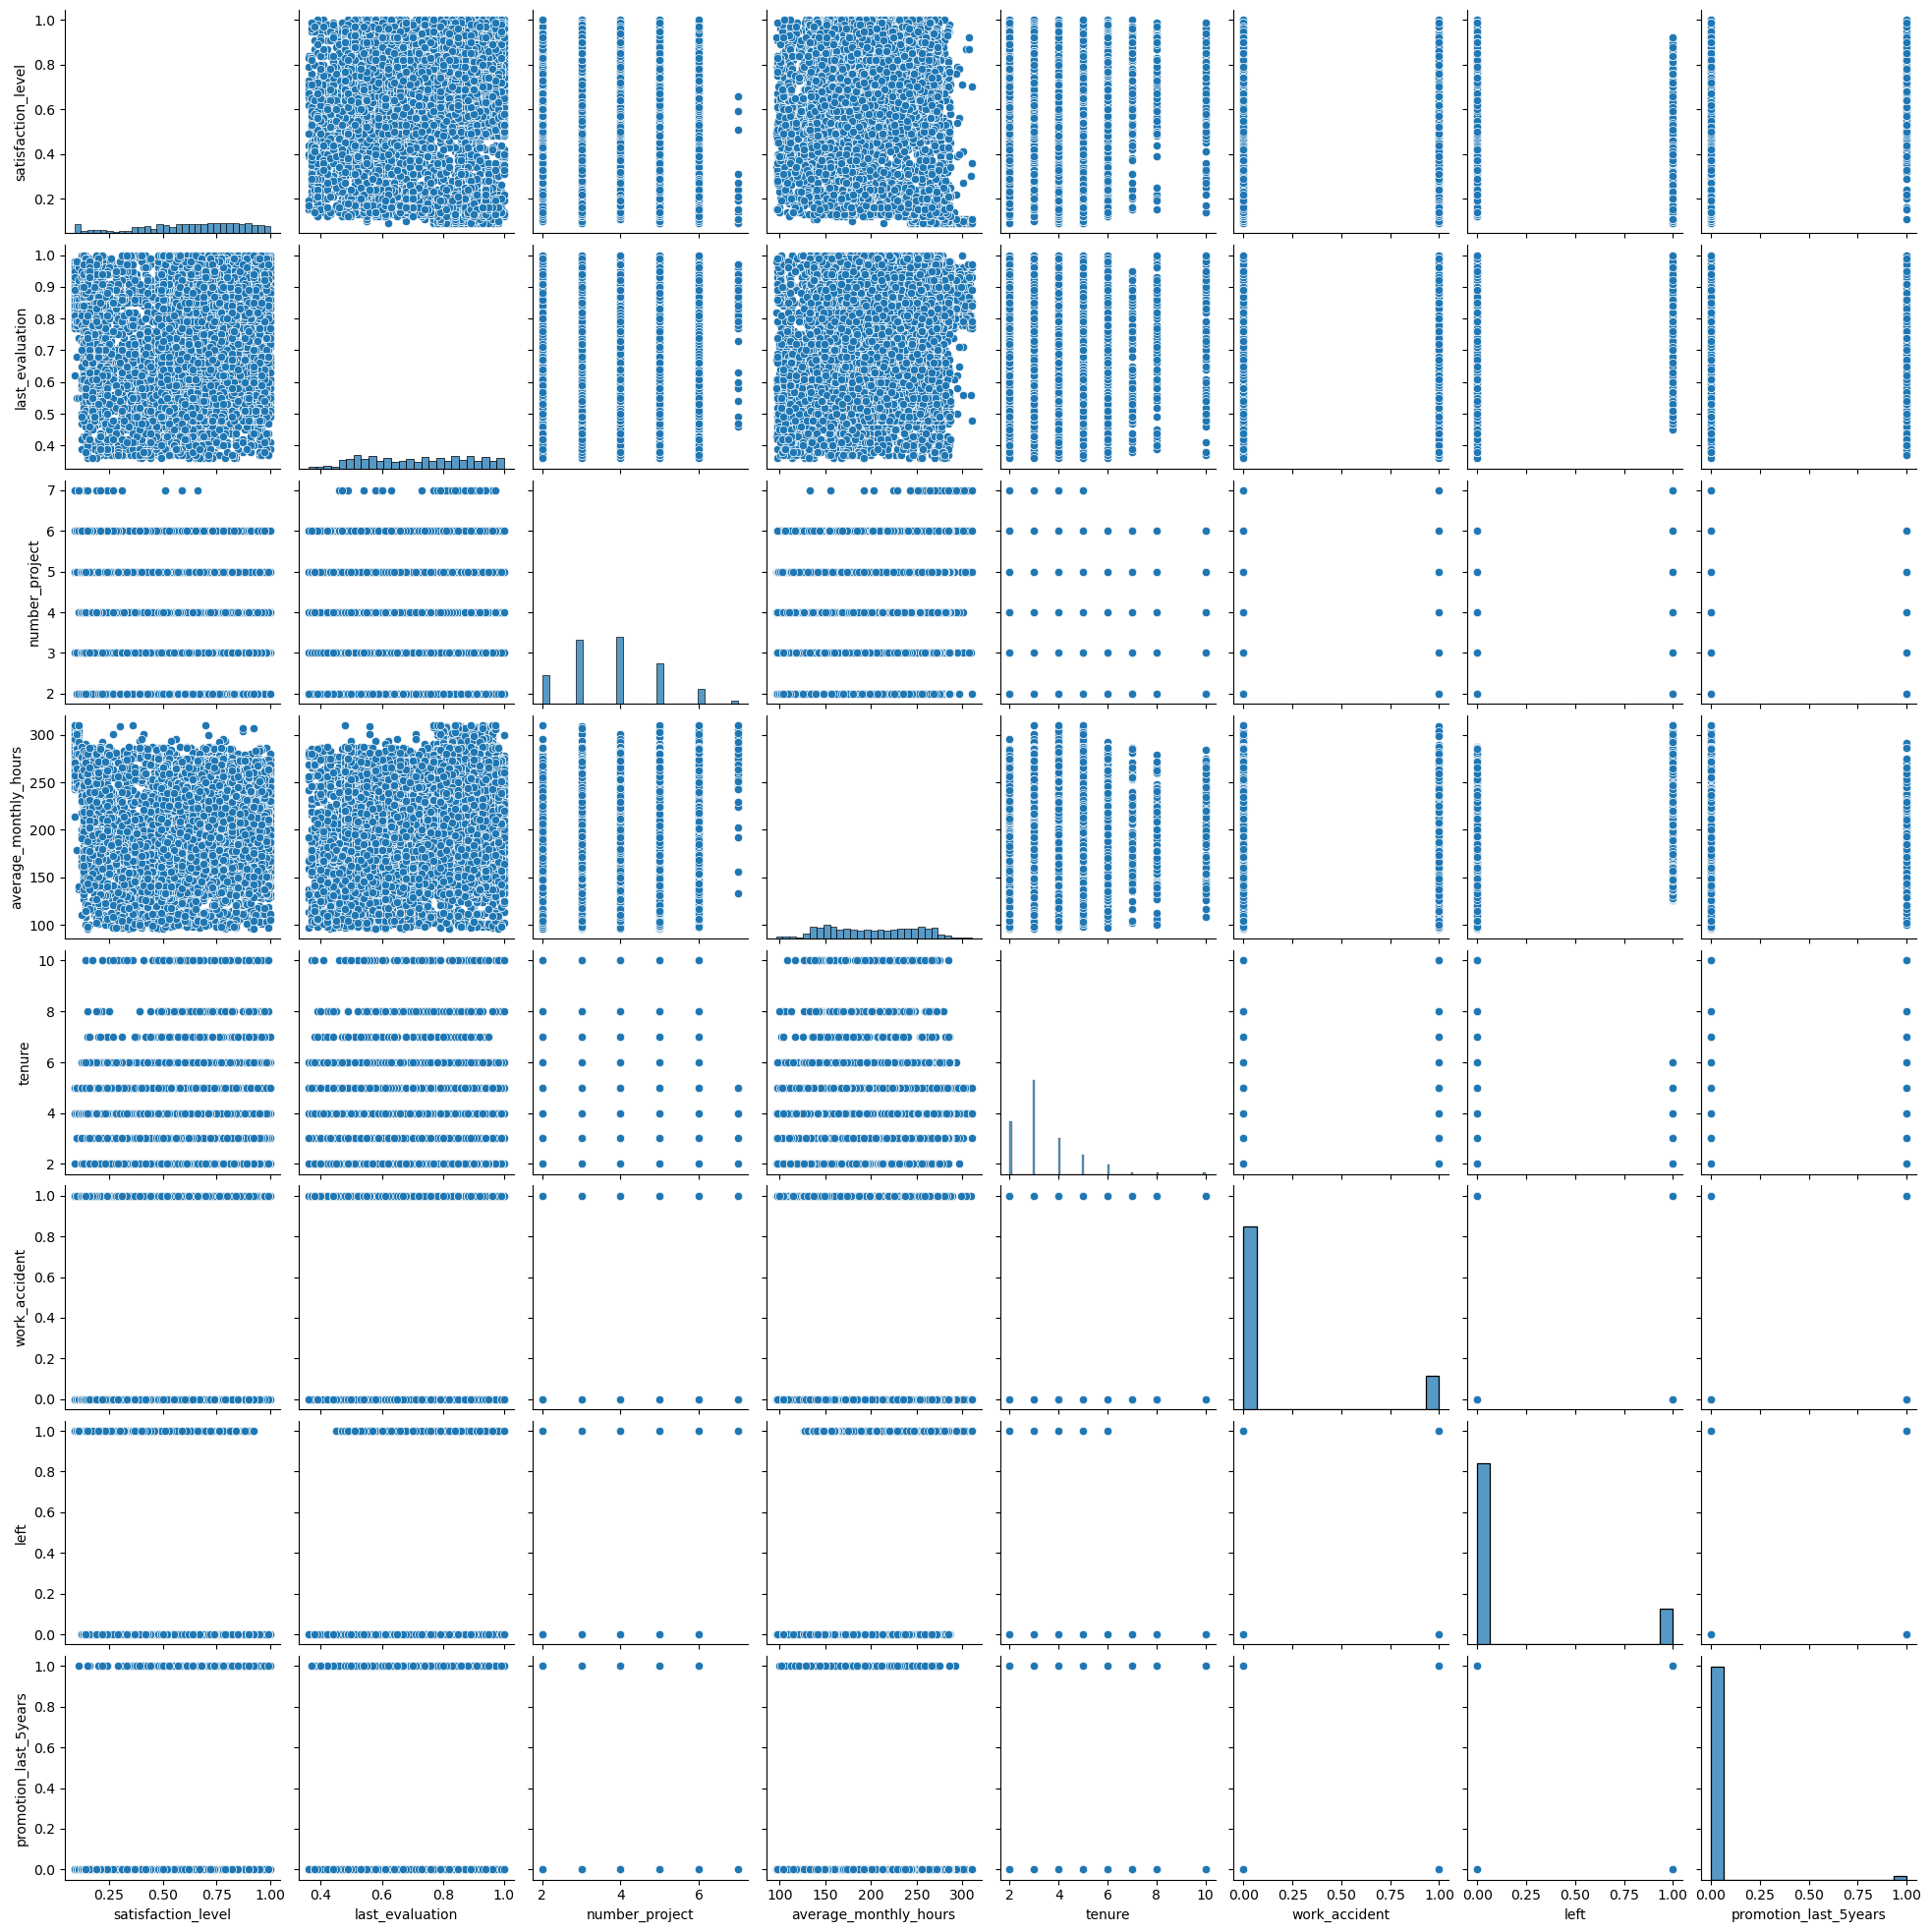

In [15]:
sns.pairplot(df)

### Check outliers

Check for outliers in the data.

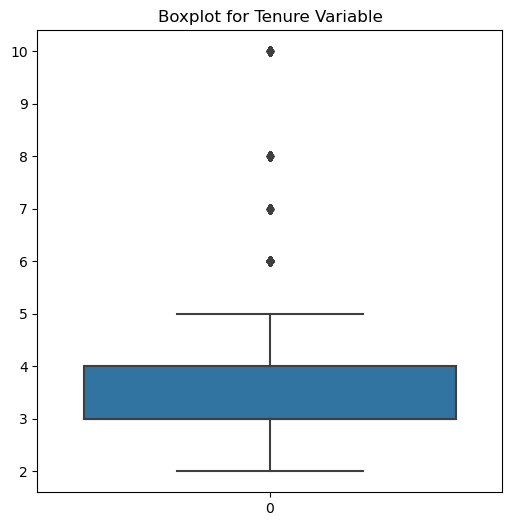

In [16]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
sns.boxplot(df['tenure'])
ax.set_title('Boxplot for Tenure Variable')
plt.show()

In [17]:
#Outliers using iqr method
iqr = df['tenure'].quantile(0.75) - df['tenure'].quantile(0.25)
upper_outlier_boundary = (1.5*iqr)+ df['tenure'].quantile(0.75)
lower_outlier_boundary = df['tenure'] - (1.5*iqr)
rows_above = df.loc[df['tenure']>upper_outlier_boundary].shape[0]
rows_below = df.loc[df['tenure']<lower_outlier_boundary].shape[0]
print(f'There are {rows_above} high outlier rows and {rows_below} low outliers.')

There are 824 high outlier rows and 0 low outliers.


### Since we will be using an XGBoost model in our evaluation process, these outliers will need to be addressed prior to modeling.

In [18]:
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [19]:
def make_boxplot(data):
    plt.figure(figsize=(2,2))
    sns.boxplot(data)
    plt.show()

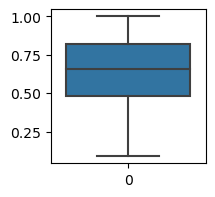

In [20]:
make_boxplot(df['satisfaction_level'])

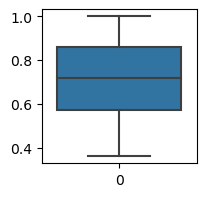

In [21]:
make_boxplot(df['last_evaluation'])

    


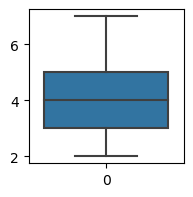

In [22]:
make_boxplot(df['number_project'])

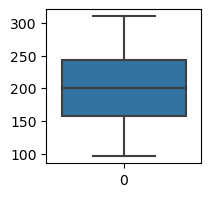

In [23]:
make_boxplot(df['average_monthly_hours'])

After reviewing the numerical variables, outliers only exist and need fixing in the 'tenure feature.'

In [24]:
df['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [25]:
df['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [26]:
df['promotion_last_5years'].value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

In the categorical variable there is some imbalance, and the variable that will become the target variable, 'left', there is a significant imbalance, which will have to be adjusted for in the moelling process.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1 There appears to no strong relationships between the variables.
2 The distributions are acceptable for our modelling purposes with the exception of 'tenure' outliers.
3 I fixed some variable names, identified no null values and droped a significant number of duplicate rows.
4 EDA prior to modelling is make the data in a format acceptable for our modelling and build features to enhance the models capabilities.
5 I used Saeborn, matplotlib and pandas documentation.
https://seaborn.pydata.org
https://matplotlib.org/stable/
https://pandas.pydata.org/docs/
6 There is no personal data identifying employees or any data such as age or gender that might lead our model to discriminate.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [27]:
num_rows = df.shape[0]
vc_list = list(df['left'].value_counts())
num_left = vc_list[1]
perc_left = round(num_left/num_rows, 2)* 100
print(f'The percentage of employees that left is: {perc_left}%')


The percentage of employees that left is: 17.0%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [28]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [29]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [30]:
df['work_accident'].value_counts()

0    10141
1     1850
Name: work_accident, dtype: int64

Text(0.5, 1.0, 'Histogram of Nummber of Projects, left vs stayed')

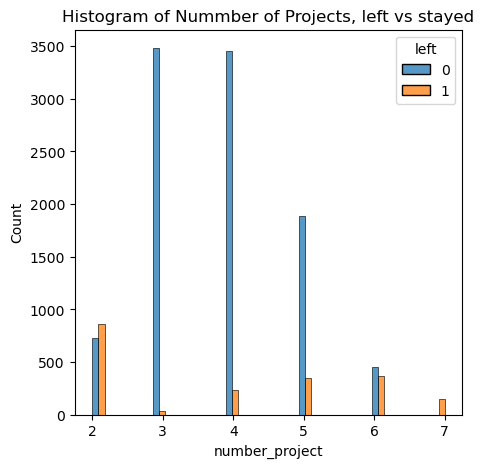

In [31]:
plt.figure(figsize=(5,5))
sns.histplot(data= df, x='number_project',hue = 'left', multiple = 'dodge')
plt.title('Histogram of Nummber of Projects, left vs stayed')

It is apparent from the above visualization that the best ratio of stay/left is for employees who worked on 3-4 projects.  All of the employees on 7 projects left and employees who worked on 2 had more depart than stay.

Text(0.5, 1.0, 'Satisfaction Level vs Last Evaluation')

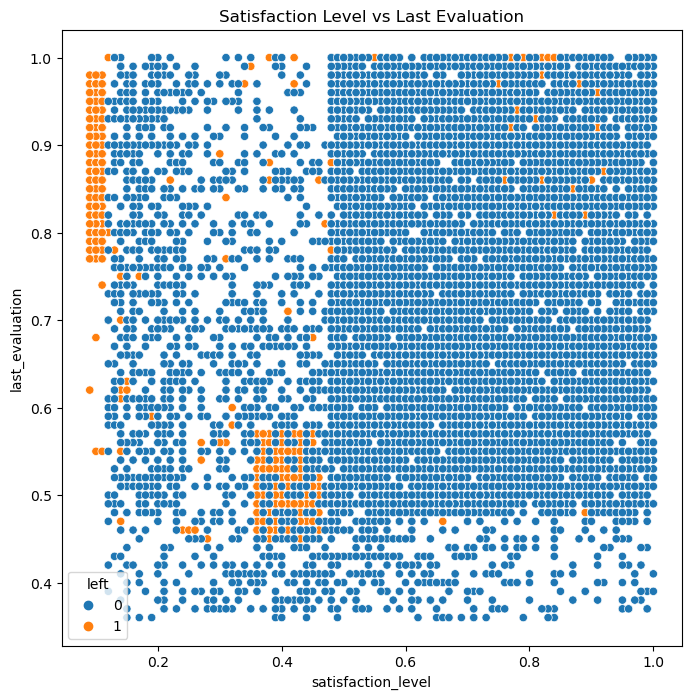

In [32]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df,x= df['satisfaction_level'], y = df['last_evaluation'], hue='left')
plt.title('Satisfaction Level vs Last Evaluation')

There is an interesting block of employees that have high scores in evaluation, low satisfaction levels and left the company.

<Axes: xlabel='satisfaction_level', ylabel='Count'>

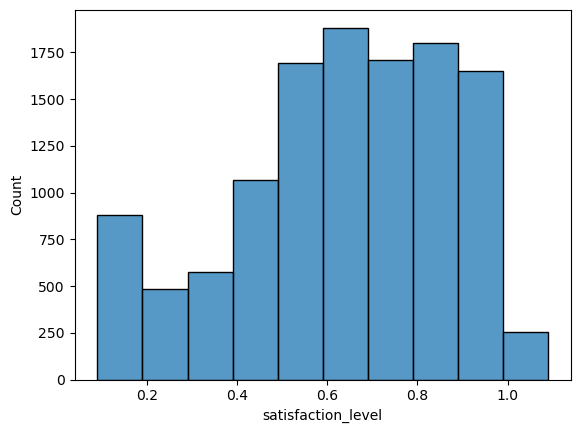

In [33]:
sns.histplot(data = df,x='satisfaction_level', binwidth=0.1)

<Axes: xlabel='salary', ylabel='Count'>

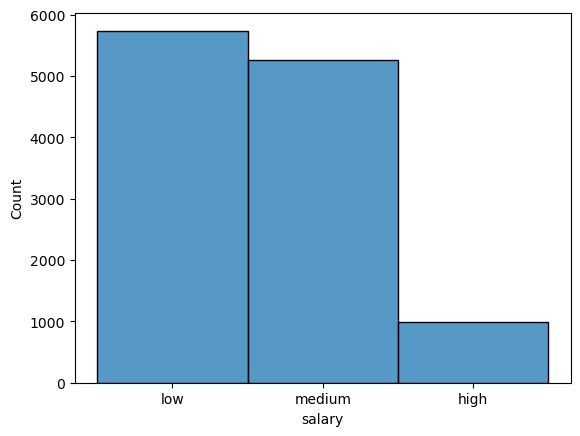

In [34]:
sns.histplot(df['salary'])

In [35]:
sat_level_mean_low = round(df['satisfaction_level'].loc[df['salary'] == 'low'].mean(),2)
sat_level_mean_med = round(df['satisfaction_level'].loc[df['salary'] == 'medium'].mean(),2)
sat_level_mean_high = round(df['satisfaction_level'].loc[df['salary'] == 'high'].mean(),2)
print(sat_level_mean_high,sat_level_mean_med,sat_level_mean_low)

0.64 0.63 0.62


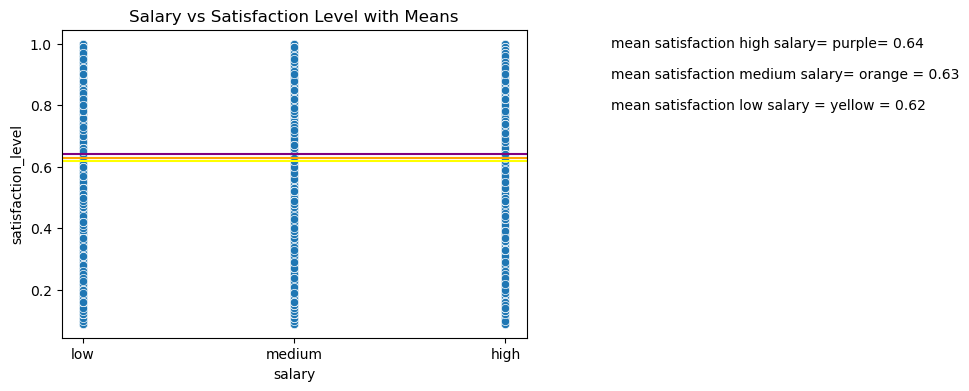

In [36]:
plt.figure(figsize=(6,4))
sns.scatterplot(x = 'salary', y= 'satisfaction_level', data = df)
plt.axhline(sat_level_mean_low, color =  'yellow')
plt.axhline(sat_level_mean_med, color= 'orange')
plt.axhline(sat_level_mean_high, color = 'purple')
plt.text(2.5,1, 'mean satisfaction high salary= purple= 0.64', ha = 'left', va = 'center')
plt.text(2.5,.9, 'mean satisfaction medium salary= orange = 0.63', ha = 'left', va = 'center')
plt.text(2.5,.8, 'mean satisfaction low salary = yellow = 0.62', ha = 'left', va = 'center')
plt.title('Salary vs Satisfaction Level with Means')
plt.show()

From the visualization above, the mean satisfaction does not vary according to salary.

#### Investigating the relationship between promoted employee satisfaction and not.

In [37]:
df['promotion_last_5years'].value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

In [38]:
sat_level_mean_no_promo = round(df['satisfaction_level'].loc[df['promotion_last_5years'] == 0].mean(),2)
sat_level_mean_promo = round(df['satisfaction_level'].loc[df['promotion_last_5years'] == 1].mean(),2)

print(sat_level_mean_no_promo, sat_level_mean_promo)

0.63 0.67


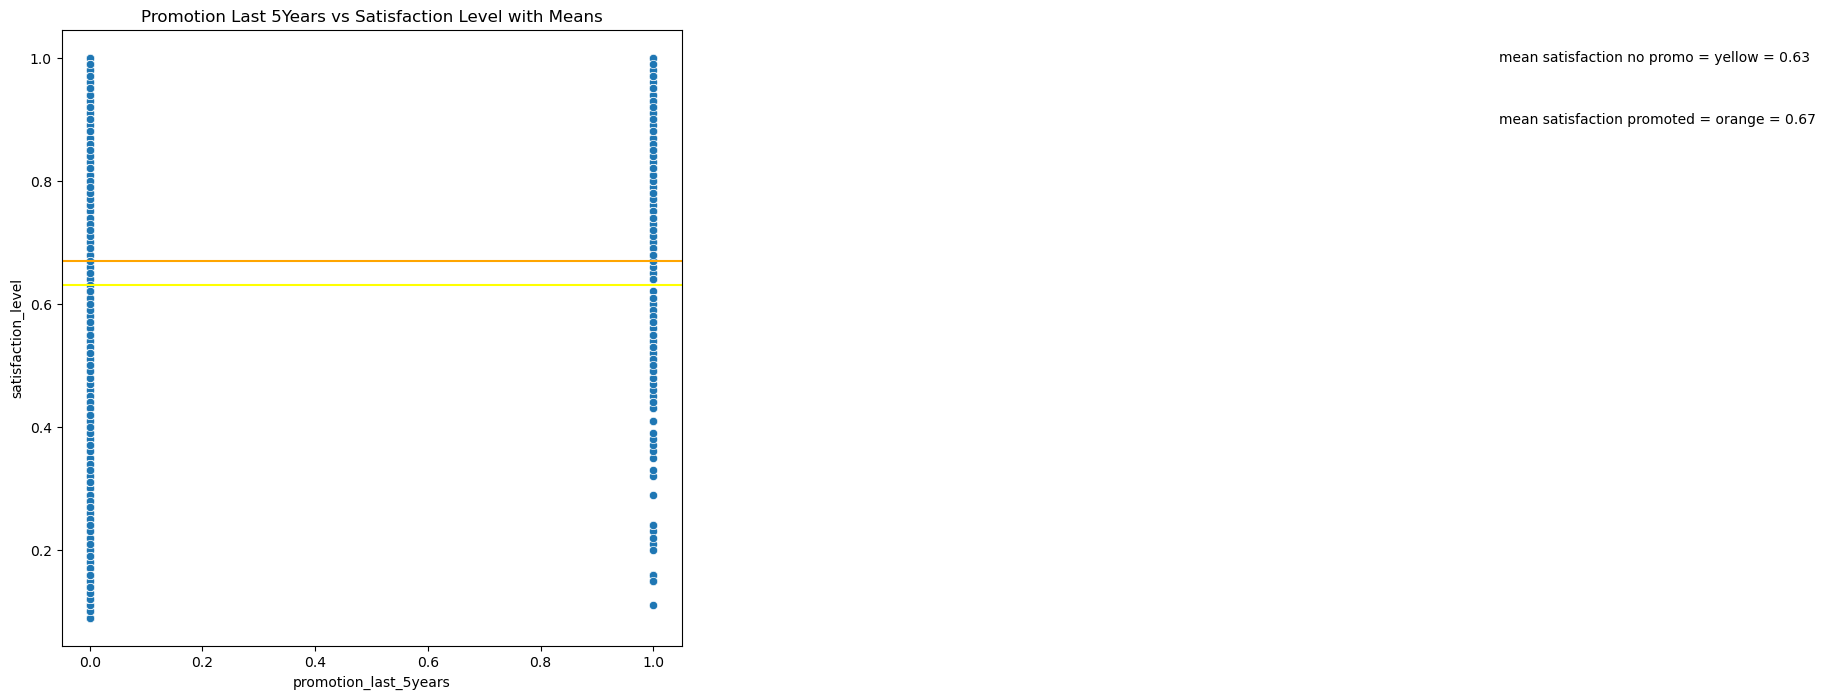

In [39]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'promotion_last_5years', y= 'satisfaction_level', data = df)
plt.axhline(sat_level_mean_no_promo, color =  'yellow')
plt.axhline(sat_level_mean_promo, color= 'orange')
plt.text(2.5,1, 'mean satisfaction no promo = yellow = 0.63', ha = 'left', va = 'center')
plt.text(2.5,.9, 'mean satisfaction promoted = orange = 0.67', ha = 'left', va = 'center')
plt.title('Promotion Last 5Years vs Satisfaction Level with Means')
plt.show()


There appears to be more seperation on the mean satisfaction of employees who were promoted and those who were not.

#### Investigating the realtionship between satisfaction scores and the target variable 'left'

In [40]:
sat_level_mean_left = round(df['satisfaction_level'].loc[df['left'] ==1].mean(),3)
sat_level_mean_not_left = round(df['satisfaction_level'].loc[df['left'] ==0].mean(),3)
print(sat_level_mean_left, sat_level_mean_not_left)

0.44 0.667


There does appear to be a larger difference in satisfaction score bewteen employeees who left and those who did not.

<Axes: xlabel='average_monthly_hours', ylabel='satisfaction_level'>

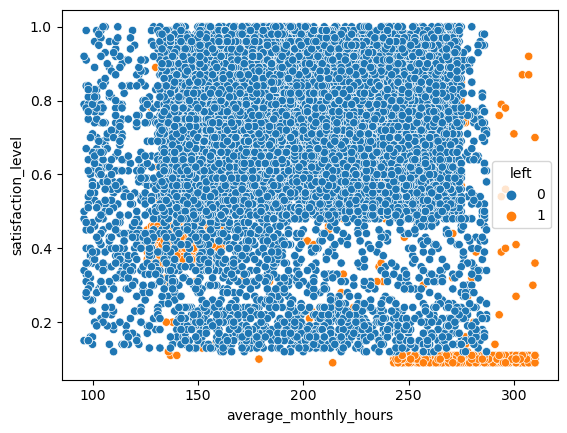

In [41]:
sns.scatterplot(x='average_monthly_hours', y = 'satisfaction_level', data = df, hue='left')

There appears to a relationship between employees who work the highest hours with a low satisfaction level who leave.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


### Addressing outliers in the Tenure variable

There are 824 high ouytliers in the data, that is too many to simply eliminate we will transform these values so they do not skew our XGBoost model.  It is also likely that the outliers are accurate data so we want to keep them in the dataset but replace them with a high value that will not skew the modelling down the road.

### Winsorize the outliers in the tenure feature, outlier values will be replaced with a value of 1.5*IQR plus the 75th percentile.

In [43]:
iqr = df['tenure'].quantile(0.75) - df['tenure'].quantile(0.25)
upper_outlier_boundary = (1.5*iqr)+ df['tenure'].quantile(0.75)


In [44]:
df.loc[df['tenure']>upper_outlier_boundary, 'tenure']= upper_outlier_boundary

Text(0.5, 1.0, 'Boxplot of Tenure after correcting outliers')

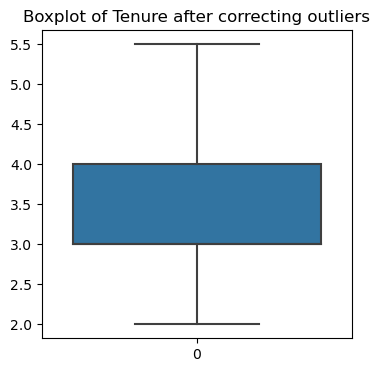

In [45]:
plt.figure(figsize=(4,4))
sns.boxplot(df['tenure'])
plt.title('Boxplot of Tenure after correcting outliers')

Tenure feature no longer contains any outliers.

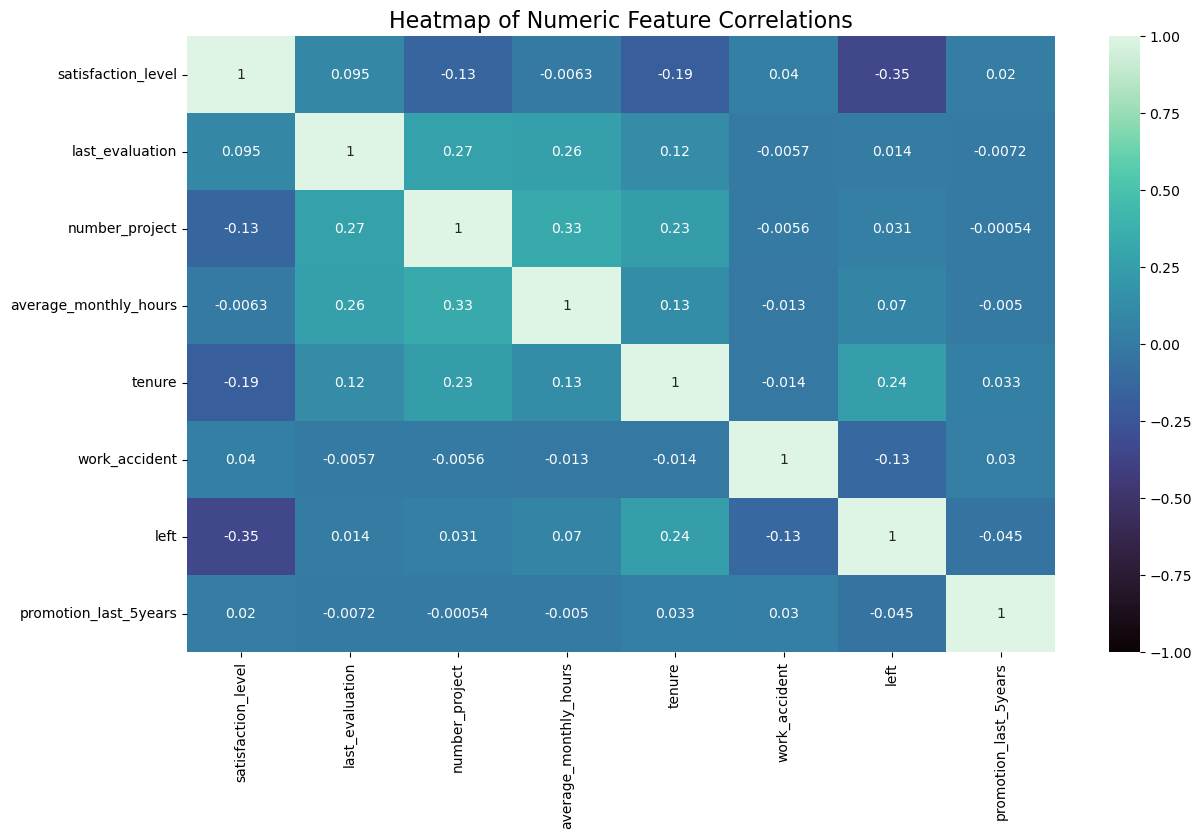

In [46]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True),vmin=-1, vmax=1, annot= True, cmap=sns.color_palette('mako',as_cmap=True))
plt.title('Heatmap of Numeric Feature Correlations', fontdict={'fontsize':16})
plt.show()

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a classification task predicting leave or stay for employees.

### Identify the types of models most appropriate for this task.

I will be using Random Forest Classifier and XGBoost Classifier

### Modeling

Add as many cells as you need to conduct the modeling process.

### Convert categorical data to numeric

In [47]:
df2 = df.copy()

### Convert numeric categorical data to strings

In [48]:
col_to_str = ['work_accident', 'promotion_last_5years']
for col in col_to_str:
    df2[col]= df2[col].astype('string')


In [49]:
df2['salary'] = (
    df2['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

In [50]:
df3 = pd.get_dummies(df2)
df3.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,left,salary,work_accident_0,work_accident_1,promotion_last_5years_0,promotion_last_5years_1,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,5.5,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4.0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [51]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   satisfaction_level       11991 non-null  float64
 1   last_evaluation          11991 non-null  float64
 2   number_project           11991 non-null  int64  
 3   average_monthly_hours    11991 non-null  int64  
 4   tenure                   11991 non-null  float64
 5   left                     11991 non-null  int64  
 6   salary                   11991 non-null  int8   
 7   work_accident_0          11991 non-null  uint8  
 8   work_accident_1          11991 non-null  uint8  
 9   promotion_last_5years_0  11991 non-null  uint8  
 10  promotion_last_5years_1  11991 non-null  uint8  
 11  department_IT            11991 non-null  uint8  
 12  department_RandD         11991 non-null  uint8  
 13  department_accounting    11991 non-null  uint8  
 14  department_hr         

In [52]:
df3.shape

(11991, 21)

### Splitting the data into train and test

In [53]:
y = df3['left']
X = df3.drop('left', axis = 1)
X.head(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,salary,work_accident_0,work_accident_1,promotion_last_5years_0,promotion_last_5years_1,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3.0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,5.5,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [54]:
X.shape, y.shape

((11991, 20), (11991,))

In [55]:
X.dtypes

satisfaction_level         float64
last_evaluation            float64
number_project               int64
average_monthly_hours        int64
tenure                     float64
salary                        int8
work_accident_0              uint8
work_accident_1              uint8
promotion_last_5years_0      uint8
promotion_last_5years_1      uint8
department_IT                uint8
department_RandD             uint8
department_accounting        uint8
department_hr                uint8
department_management        uint8
department_marketing         uint8
department_product_mng       uint8
department_sales             uint8
department_support           uint8
department_technical         uint8
dtype: object

In [56]:
y.dtypes

dtype('int64')

In [57]:
y.value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.20, random_state=42)

In [59]:
X_test.shape, y_test.shape

((2399, 20), (2399,))

In [60]:
X_train.shape, y_train.shape

((9592, 20), (9592,))

In [61]:
y_train.value_counts()

0    7999
1    1593
Name: left, dtype: int64

In [62]:
y_test.value_counts()

0    2001
1     398
Name: left, dtype: int64

In [63]:
rf = RandomForestClassifier(random_state=42)
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [50, 300, 500],
             }  
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [64]:
rf_cv = GridSearchCV(rf, cv_params, n_jobs= -1, scoring=scoring, cv =5, refit= 'f1')

In [65]:
##%%time
##rf_cv.fit(X_train, y_train)

In [66]:
##rf_cv.best_score_

In [67]:
path = '/Users/patrickanderson/Desktop/Google Data Analytics'

In [68]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [69]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [70]:
##write_pickle(path, rf_cv, "rf_cv_sailfort")
rf_cv = read_pickle(path, "rf_cv_sailfort")

In [71]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [72]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [73]:
results = make_results("Random Forest Classifier CV", rf_cv, 'f1')
results

,model,precision,recall,F1,accuracy
0,Random Forest Classifier CV,0.982508,0.916502,0.948333,0.983424


In [74]:
rf_preds = rf_cv.predict(X_test)


In [75]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [76]:
rf_test_scores = get_test_scores('RF CV Test', rf_preds, y_test)
rf_test_scores

,model,precision,recall,F1,accuracy
0,RF CV Test,0.978836,0.929648,0.953608,0.984994


In [77]:
results = pd.concat([results, rf_test_scores],axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest Classifier CV,0.982508,0.916502,0.948333,0.983424
0,RF CV Test,0.978836,0.929648,0.953608,0.984994


### The cross validated random forest model produced very solid results and actually performed marginally better on the test data than the training data.

## XGBoost Modelling

In [78]:
df4 = df3.copy()

In [79]:
df4.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,left,salary,work_accident_0,work_accident_1,promotion_last_5years_0,promotion_last_5years_1,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,5.5,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4.0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [80]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   satisfaction_level       11991 non-null  float64
 1   last_evaluation          11991 non-null  float64
 2   number_project           11991 non-null  int64  
 3   average_monthly_hours    11991 non-null  int64  
 4   tenure                   11991 non-null  float64
 5   left                     11991 non-null  int64  
 6   salary                   11991 non-null  int8   
 7   work_accident_0          11991 non-null  uint8  
 8   work_accident_1          11991 non-null  uint8  
 9   promotion_last_5years_0  11991 non-null  uint8  
 10  promotion_last_5years_1  11991 non-null  uint8  
 11  department_IT            11991 non-null  uint8  
 12  department_RandD         11991 non-null  uint8  
 13  department_accounting    11991 non-null  uint8  
 14  department_hr         

In [81]:
y_xgb= df4['left']
X_xgb= df4.drop('left', axis=1)

In [82]:
X_xgb.shape, y_xgb.shape

((11991, 20), (11991,))

In [83]:
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, stratify=y,
                                                                   test_size=0.25, random_state=42)

In [84]:
xgb = XGBClassifier(random_state = 42)

cv_param_xgb = {'max_depth':[None],
                'n_estimators':[50,100,250,500],
                'min_child_weight':[1,2],
                'learning_rate':[0.01,0.1,0.3]}

scoring = ['accuracy', 'precision', 'recall', 'f1']

xgb_cv = GridSearchCV(xgb,
                     param_grid=cv_param_xgb,
                     scoring= scoring,
                     cv=5,
                     refit= 'f1',
                     n_jobs= -1)

In [85]:
##%%time
##xgb_cv.fit(X_xgb_train, y_xgb_train)

In [86]:
##write_pickle(path, xgb_cv, 'XGB_CV_Sailfort')

In [87]:
xgb_cv = read_pickle(path, 'XGB_CV_Sailfort')

In [88]:
xgb_cv.best_score_

0.9457577590358033

In [89]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': None,
 'min_child_weight': 1,
 'n_estimators': 100}

In [90]:
xgb_preds = xgb_cv.predict(X_xgb_test)

In [91]:
xgb_results = make_results('XGB_CV', xgb_cv, 'f1')

In [92]:
results = pd.concat([results, xgb_results], axis = 0)
results

,model,precision,recall,F1,accuracy
0,Random Forest Classifier CV,0.982508,0.916502,0.948333,0.983424
0,RF CV Test,0.978836,0.929648,0.953608,0.984994
0,XGB_CV,0.976557,0.916938,0.945758,0.982542


In [95]:
xgb_test_scores = get_test_scores("XGB CV Test", xgb_preds, y_xgb_test)
xgb_test_scores

,model,precision,recall,F1,accuracy
0,XGB CV Test,0.976695,0.925703,0.950515,0.983989


In [96]:
results = pd.concat([results,xgb_test_scores], axis = 0)
results

,model,precision,recall,F1,accuracy
0,Random Forest Classifier CV,0.982508,0.916502,0.948333,0.983424
0,RF CV Test,0.978836,0.929648,0.953608,0.984994
0,XGB_CV,0.976557,0.916938,0.945758,0.982542
0,XGB CV Test,0.976695,0.925703,0.950515,0.983989


<Figure size 800x800 with 0 Axes>

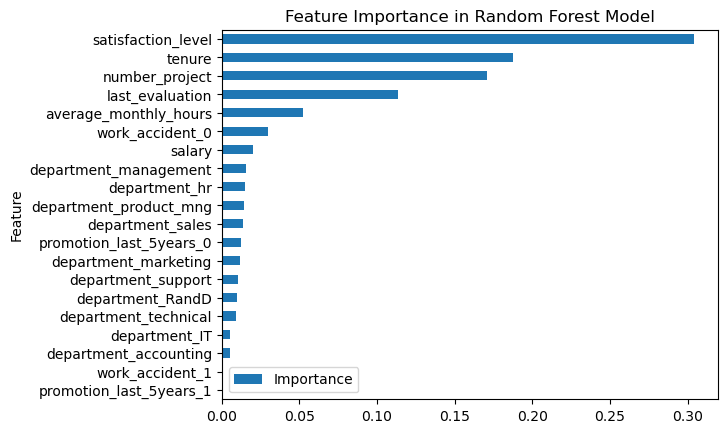

In [103]:
feat_imp = rf_cv.best_estimator_.feature_importances_
feat_df_rf = pd.DataFrame({'Feature':X.columns, 'Importance':feat_imp})
feat_df_rf_sorted = feat_df.sort_values('Importance')
fig= plt.figure(figsize=(8,8))
feat_df_rf_sorted.plot(kind = 'barh', x= 'Feature', y= 'Importance')
plt.title('Feature Importance in Random Forest Model')

plt.show()

<Figure size 800x800 with 0 Axes>

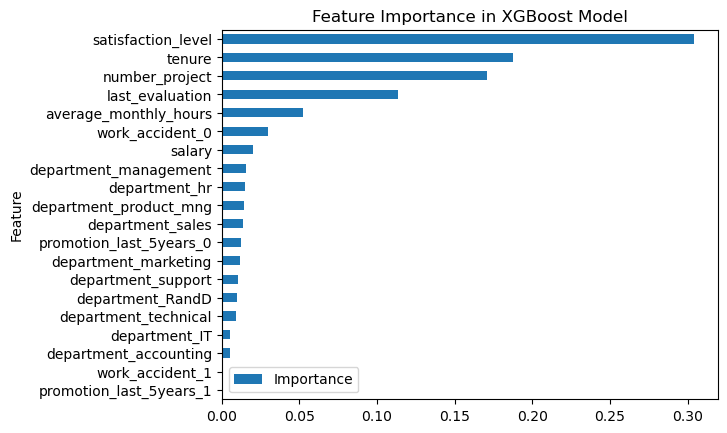

In [104]:
feat_imp = xgb_cv.best_estimator_.feature_importances_
feat_df = pd.DataFrame({'Feature':X.columns, 'Importance':feat_imp})
feat_df_sorted = feat_df.sort_values('Importance')
fig= plt.figure(figsize=(8,8))
feat_df_sorted.plot(kind = 'barh', x= 'Feature', y= 'Importance')
plt.title('Feature Importance in XGBoost Model')

plt.show()


Text(0.5, 1.0, 'Histogram of Tenure Left vs Stayed')

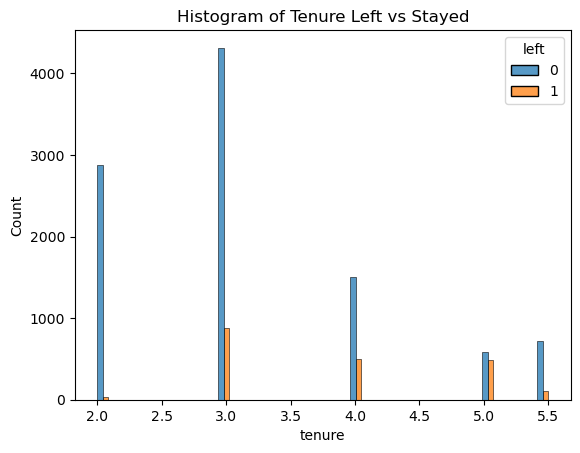

In [106]:
sns.histplot(data = df4, x='tenure', hue = 'left', multiple='dodge')
plt.title('Histogram of Tenure Left vs Stayed')

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Both of the models perfromed quite well and had very similar performance scores.  The most important features for prediction in both models were satisfaction level, tenure, and number of projects.  

Because satisfaction level is a subjective metric provided by the employee and the company can only address low scores after the employee is dissatisfied, this is more of an evaluation metric rather than a variable modifieable through the company's behaivior.  From the histogram above, the company should focus efforts on retention the most on employee with 2-5 years of tenure as they are the most likely to leave (2 years included because the decision to change jobs is likely not made as a split second decision but rather a more longer term decision making process).  The number of projects is the feature that the company can most easily manage and has a significant effect on employee retention.

To my manager, we should discuss further EDA and modelling to explore the relationships between these ost important variable and even create new regression model to try to predict satisfaction level.  See below.

Models can always be imporoved, more data points would be positive as well as data such as team numbers if any and number of employees reporting to.

We could address the number of projects/ average hours worked/ satisfaction level.

I used Seaborn, XGBoost and SKLearn, all linkes list in first cells.

I do not have any ethical concerns a this point.

### Regression to predict Satisfaction Level

In [114]:
df5 = df4.copy()

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
df5.drop('left', axis = 1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,salary,work_accident_0,work_accident_1,promotion_last_5years_0,promotion_last_5years_1,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3.0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,5.5,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4.0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5.0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3.0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,5.5,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,5.5,2,1,0,0,1,0,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,5.5,2,1,0,0,1,0,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,5.5,2,1,0,0,1,0,0,0,0,0,1,0,0,0,0


In [117]:
y_reg = df5['satisfaction_level']
X_reg = df5.drop('satisfaction_level', axis = 1)

In [118]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, stratify=y, test_size=0.25,random_state=42)

In [121]:
rf_reg = RandomForestRegressor(random_state = 42)
cv_params = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 400]}
rf_reg_cv = GridSearchCV(estimator=rf_reg, n_jobs = -1, param_grid=cv_params, cv = 5)

In [122]:
##%%time
##rf_reg_cv.fit(X_reg_train, y_reg_train)

CPU times: user 9.72 s, sys: 1.89 s, total: 11.6 s
Wall time: 4min 19s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 400]})

In [123]:
##write_pickle(path, rf_reg_cv, "RF_CV_Regression_Sailfort")

In [125]:
rf_reg_cv = read_pickle(path, "RF_CV_Regression_Sailfort")

In [126]:
rf_reg_cv.best_score_

0.3849475401967867

<Figure size 800x800 with 0 Axes>

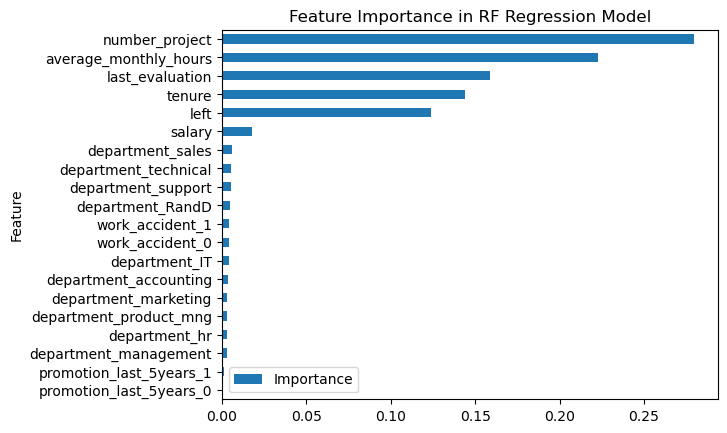

In [127]:
feat_imp = rf_reg_cv.best_estimator_.feature_importances_
feat_df = pd.DataFrame({'Feature':X_reg.columns, 'Importance':feat_imp})
feat_df_sorted = feat_df.sort_values('Importance')
fig= plt.figure(figsize=(8,8))
feat_df_sorted.plot(kind = 'barh', x= 'Feature', y= 'Importance')
plt.title('Feature Importance in RF Regression Model')

plt.show()

From the histogram above, we can see that number of projects, average monthly hours and last evaluation are the variables that most significantly predict satisfaction level.  Since staisfaction level is the most important feature in predicting retention.  These three metrics should be considered when managing employees.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

I would select the XGBoost model for fuutre used even tjough it scored ever so slightly lower in F1 scores (see below).  Both models were quite accurate and placed similar weight on the same features.  The XGBoost was selected based upon run time which was shorter by a large margin.  

The XGBoost model had high scores in every valuation metric showing it is a very solid predictor of retention based upon the provided data.

In [128]:
results

,model,precision,recall,F1,accuracy
0,Random Forest Classifier CV,0.982508,0.916502,0.948333,0.983424
0,RF CV Test,0.978836,0.929648,0.953608,0.984994
0,XGB_CV,0.976557,0.916938,0.945758,0.982542
0,XGB CV Test,0.976695,0.925703,0.950515,0.983989


### Conclusion, Recommendations, Next Steps

My conclusion from the data provided is that workload as demonstrated by the number of projects and average monthly hours variables are the strongest predictors of retention that the company can monitor and manage.  By managing employee workload, the company can imporve satisfaction levels which lead to employee retention.